<a href="https://colab.research.google.com/github/s-r-aman/machine_learning_playground/blob/master/fastdotai_dl/lesson5_mnistsgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

In [0]:
path = Config().data_path()/'mnist'

In [0]:
!wget http://deeplearning.net/data/mnist/mnist.pkl.gz

In [11]:
!ls ../root/.fastai -a

.  ..  config.yml  data


In [0]:
!mkdir ../root/.fastai/data

In [12]:
!ls ../root/.fastai/data -a

.  ..


In [0]:
mkdir ../root/.fastai/data/mnist

In [0]:
!mv mnist.pkl.gz ../root/.fastai/data/mnist/mnist.pkl.gz

In [0]:
with gzip.open(path/'mnist.pkl.gz') as f:
  ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

(50000, 784)

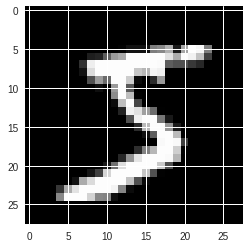

In [20]:
plt.imshow(x_train[0].reshape(28 , 28), cmap='gray')
x_train.shape

In [21]:
x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train.shape, y_train.min(), y_train.max()

(torch.Size([50000, 784]), tensor(0), tensor(9))

In [0]:
bs=64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [23]:
x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [0]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10, bias=True)

    def forward(self, xb): return self.lin(xb)

In [0]:
model = Mnist_Logistic().cuda()

In [26]:
model

Mnist_Logistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [28]:
model.lin

Linear(in_features=784, out_features=10, bias=True)

In [29]:
[p.shape for p in model.parameters()]

[torch.Size([10, 784]), torch.Size([10])]

In [0]:
lr=2e-2

In [0]:
loss_func = nn.CrossEntropyLoss()

In [0]:
def update(x,y,lr):
    wd = 1e-5
    y_hat = model(x)
    # weight decay
    w2 = 0.
    for p in model.parameters(): w2 += (p**2).sum()
    # add to regular loss
    loss = loss_func(y_hat, y) + w2*wd
    loss.backward()
    with torch.no_grad():
        for p in model.parameters():
            p.sub_(lr * p.grad)
            p.grad.zero_()
    return loss.item()

In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]

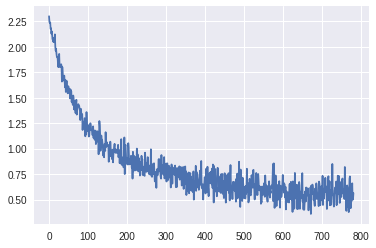

In [34]:
plt.plot(losses);